In [7]:
from qiskit import *
from qiskit import quantum_info
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
#import numpy as np
from sympy import symbols, Matrix, cos, pi
from matplotlib.pyplot import cm

In [8]:
#   cschx=1/sinhx     sechx=1/coshx   


import numpy as np
def k(theta, alpha):
    return np.sqrt((-1+2*alpha**2 + np.cosh(theta))/(-1+np.cosh(theta)))



def U(theta, alpha):
    return np.array([[(1-2*1j*alpha*(1/np.sinh(theta)))/(k(theta,alpha)), 0, 0, (-1j*alpha*(1/np.cosh(theta/2)))/(k(theta,alpha))],
                     
                     [0, ((-4*1j*alpha*(np.cos(0.25*(np.pi+1j*theta)))**2)*(1/np.sinh(theta)))/(k(theta,alpha)),
                      (2*(np.cos(0.25*(np.pi+1j*theta)))**2)*(1/np.cosh(theta/2))/(k(theta,alpha)),0],
                     
                    [0,(2*(1/np.cosh(theta/2))*(np.sin(0.25*(np.pi+1j*theta)))**2)/(k(theta,alpha)),
                     ((-4*1j*alpha*(np.sin(0.25*(np.pi+1j*theta)))**2)*(1/np.sinh(theta)))/(k(theta,alpha)),0],
                     
                    [(1j*alpha*(1/np.cosh(theta/2)))/(k(theta,alpha)),0,0,(-1-2*1j*alpha*(1/np.sinh(theta)))/(k(theta,alpha))]])



#A = []
#t = np.arange(0.1, np.pi,0.1)
#
#
#j = 2
#
#for i in np.arange(0.1, np.pi,0.1):
#    temp = (U(i,j).conj().T)@U(i,j)
#    eigvals = np.linalg.eigvals(temp)
#    A.append(eigvals)
#        
#A = np.asarray(A)
#plt.plot(A,t)

In [9]:
#variables
theta0 = 0.001   #initial theta
theta1 = 2    #final theta
alpha = 2
shots = 1    
#res = 0.001
res_list = np.array([0.01])


#plotting specs
color = iter(cm.rainbow(np.linspace(0, 1, 4)))

qc = QuantumCircuit(2)



for res in res_list:  
    A = []
    B = []
    C = []
    D = []
    c = next(color)
    #create initial statevector 
    v0 = np.array([0,0,0,1])
    init = U(theta0,alpha)@v0
    init = init.tolist()
    QuantumCircuit.initialize(qc,init,[0,1]) 
    sim = Aer.get_backend('statevector_simulator')
    state= quantum_info.Statevector(init)
    #qc = transpile(qc, sim)
    
    #sweep through theta and get statevector components for each iteration
    for theta in np.arange(theta0, theta1, res):  
        matrix = U(theta,alpha)
        qc.unitary(matrix, [0,1])
        #qc.measure_all()
        # Assemble circuit into a Qobj that can be run
        qobj = assemble(qc)
        # Evolve the state by the quantum circuit
        state = state.evolve(qc)
        # Store absolute square value of first eigenvector's coeff for each theta
        A.append(np.abs(state[0])**2)
        B.append(np.abs(state[3])**2)
        C.append(np.abs(state[1])**2)
        D.append(np.abs(state[2])**2)
        
    
        
    theta_sweep=np.arange(theta0, theta1, res)   
    A = np.asarray(A)
    B = np.asarray(B)
    C = np.asarray(C)
    D = np.asarray(D)
    plt.plot(theta_sweep, A,'-', c=c)
    c = next(color)
    plt.plot(theta_sweep, B,'-', c=c)
    c = next(color)
    plt.plot(theta_sweep, C,'-', c=c)
    c = next(color)
    plt.plot(theta_sweep, D,'c', c=c)
    
    
    plt.xlabel(r'$\theta$')
    plt.ylabel('Amplitude')
    #plt.title('Time evolution for different Trotter step sizes')
    

#plt.savefig('/Users/albertozorzato/Desktop/Programming/Plots/all_vectors_plot_res=0.01.pdf')


Error in callback <function _draw_all_if_interactive at 0x7fe726d8c820> (for post_execute):


/tmp/ipykernel_70/2514189646.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c" (-> color=(0.0, 0.75, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(theta_sweep, D,'c', c=c)


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../d174ba5a1278c3ea3324ab2ddb79f45c.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../d174ba5a1278c3ea3324ab2ddb79f45c.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on d174ba5a1278c3ea3324ab2ddb79f45c.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../d174ba5a1278c3ea3324ab2ddb79f45c.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../d174ba5a1278c3ea3324ab2ddb79f45c.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on d174ba5a1278c3ea3324ab2ddb79f45c.log.




<Figure size 640x480 with 1 Axes>

In [ ]:
#prossimo passo è rendere tutto "real" rendendolo stocastico e facendo avg su tante simulazioni



#here we call the qasm_simulator and we run the process 'shots' number of times
#
#
#def run_hs(shots):
#    sampler = CircuitSampler(backend=Aer.get_backend("qasm_simulator"))
#    sampler.quantum_instance.run_config.shots = shots
#    hamiltonian_trotter_expectations = diagonalized_meas_op.bind_parameters({evo_time: 0.5})
#    sampled_trotter_exp_op = sampler.convert(hamiltonian_trotter_expectations)
#    sampled_trotter_energies = sampled_trotter_exp_op.eval()
#    return np.real(sampled_trotter_energies)
#
##n_shots = [100, 1000, 2000, 5000, 7000, 10000]
#exp = []
#for shots in n_shots:
#    exp.append(run_hs(shots))

In [4]:
#CIRCUIT CONSOLIDATION
theta =2.3
alpha =2



qc = QuantumCircuit(2,2)
v0 = np.array([1,0,0,0])
init = U(theta0,alpha)@v0
init = init.tolist()
QuantumCircuit.initialize(qc,init,[0,1]) 
matrix = U(theta,alpha)
qc.unitary(matrix, [0,1])
#create measurement barrier
qc.barrier(range(2))
# map the quantum measurement to the classical bits - 2 qubits get stored in 2 classical bits
qc.measure(range(2), range(2))
# Evolve the state by the quantum circuit
qc.draw()



┌─────────────────────────────────────┐┌──────────┐ ░ ┌─┐   
q_0: ┤0                                    ├┤0         ├─░─┤M├───
     │  Initialize(0.00025-1j,0,0,0.0005j) ││  Unitary │ ░ └╥┘┌─┐
q_1: ┤1                                    ├┤1         ├─░──╫─┤M├
     └─────────────────────────────────────┘└──────────┘ ░  ║ └╥┘
c: 2/═══════════════════════════════════════════════════════╩══╩═
                                                            0  1

In [5]:
#this is to get histograms


#specify the simulator to be used 
backend = Aer.get_backend('statevector_simulator')
#create a job, an executable for the backend 
job = backend.run(transpile(qc, backend), shots=2000)
#grab the results from the job
result = job.result()
#HOW TO ACCESS RESULT_SIM?

# Run and get counts
counts = result.get_counts(qc)
plot_histogram(counts, title='State counts')

#plt.savefig('/Users/albertozorzato/Desktop/Programming/Plots/t=0.5_a=2_s=2000.pdf')

###FIND WAY TO SAVE HISTOGRAM

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../c936e92fe9364f07ed68352cd9dc1cdf.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../c936e92fe9364f07ed68352cd9dc1cdf.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on c936e92fe9364f07ed68352cd9dc1cdf.log.




<Figure size 700x500 with 1 Axes>

In [6]:

from qiskit.visualization import plot_state_city

statevector = result.get_statevector()

plot_state_city(statevector)   #nice visualization 3D


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error ../c936e92fe9364f07ed68352cd9dc1cdf.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../c936e92fe9364f07ed68352cd9dc1cdf.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.8 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on c936e92fe9364f07ed68352cd9dc1cdf.log.




<Figure size 1500x500 with 2 Axes>

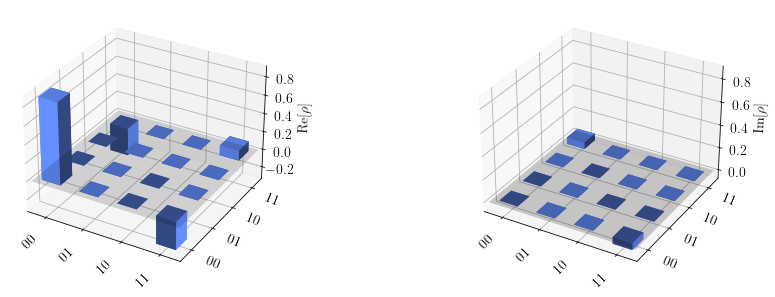

In [27]:
#FUNCTIONS
dispcolors = {'cx':('#426299', '#000000'),
              'cswap':('#705399', '#000000'),
              'cp':('#CFFF8B', '#000000')}


qc = QuantumCircuit(2)
v0 = np.array([1,0,0,0])
init = U(theta0,alpha)@v0
init = init.tolist()
QuantumCircuit.initialize(qc,init,[0,1]) 
matrix = U(0.7,2)
qc.unitary(matrix, [0,1])
qc.draw(output='mpl')

qc.decompose(reps=2).draw(output='mpl',style={'displaycolor':dispcolors}) #displays decomposition of circuit
backend = Aer.get_backend('statevector_simulator') # gets backend for simulation
job = backend.run(qc) #creates quantum program for exec
result = job.result()  #access result of sim
#status = job.status()  #check status of sim 
outputstate = result.get_statevector(qc, decimals=3)  #access statevector from results file
qobj = assemble(qc)#Assemble circuit into a Qobj that can be run

####
from qiskit.circuit import Parameter  #how to define parameter and bind it to range 
theta = Parameter('θ')
circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]  #this creates an array of circuits with different thetas
####VISUALIZATION######

from qiskit.visualization import plot_histogram
plot_histogram(counts)          #histogram of results' statistics

from qiskit.visualization import plot_state_city
plot_state_city(outputstate)   #nice visualization 3D